In [1]:
%%time
import malaya

CPU times: user 5.93 s, sys: 1.53 s, total: 7.46 s
Wall time: 12.5 s


In [2]:
positive_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan sebanyak RM50 juta. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
negative_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

All models have `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is False.**

All models have `add_neutral` parameters.
If True, it will add `neutral` probability, Else, default probabilities. **Default is True.**

## Load multinomial model

In [6]:
model = malaya.sentiment.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.003559988321312934, 'positive': 0.6440011678687021, 'neutral': 0.352438843809985}
{'negative': 0.4770205083402397, 'positive': 0.005229794916597557, 'neutral': 0.5177496967431627}


[{'negative': 0.4770205083402397,
  'positive': 0.005229794916597557,
  'neutral': 0.5177496967431627},
 {'negative': 0.4770205083402397,
  'positive': 0.005229794916597557,
  'neutral': 0.5177496967431627}]

Disable `neutral` probability,

In [7]:
print(model.predict(negative_text,get_proba=True,add_neutral=True))
print(model.predict(negative_text,get_proba=True,add_neutral=False))

{'negative': 0.4770205083402397, 'positive': 0.005229794916597557, 'neutral': 0.5177496967431627}
{'negative': 0.7385102541701198, 'positive': 0.26148974582987783}


## Load xgb model

In [8]:
model = malaya.sentiment.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.0045786616, 'positive': 0.5421338, 'neutral': 0.45328754}
{'negative': 0.688568, 'positive': 0.0031143208, 'neutral': 0.30831766}


[{'negative': 0.688568, 'positive': 0.0031143208, 'neutral': 0.30831766},
 {'negative': 0.688568, 'positive': 0.0031143208, 'neutral': 0.30831766}]

## BERT model

BERT is the best sentiment model in term of accuracy, you can check sentiment accuracy here, https://malaya.readthedocs.io/en/latest/Accuracy.html#sentiment-analysis. Question is, why BERT?

1. Transformer model learn the context of a word based on all of its surroundings (live string), bidirectionally. So it much better understand left and right hand side relationships.
2. Because of transformer able to leverage to context during live string, we dont need to capture available words in this world, instead capture substrings and build the attention after that. BERT will never have Out-Of-Vocab problem.

## List available BERT models

In [9]:
malaya.sentiment.available_bert_model()

['multilanguage', 'base', 'small']

## Load BERT models

In [11]:
model = malaya.sentiment.bert(model = 'base')

#### Predict single string

In [12]:
model.predict(positive_text,get_proba=True)

{'negative': 0.9791378, 'positive': 0.00020862265, 'neutral': 0.020653605}

#### Predict batch of strings

In [13]:
model.predict_batch([positive_text, negative_text],get_proba=True)

[{'negative': 0.97913754, 'positive': 0.00020862372, 'neutral': 0.020653844},
 {'negative': 0.9998467, 'positive': 1.5333749e-06, 'neutral': 0.00015175343}]

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(negative_text)

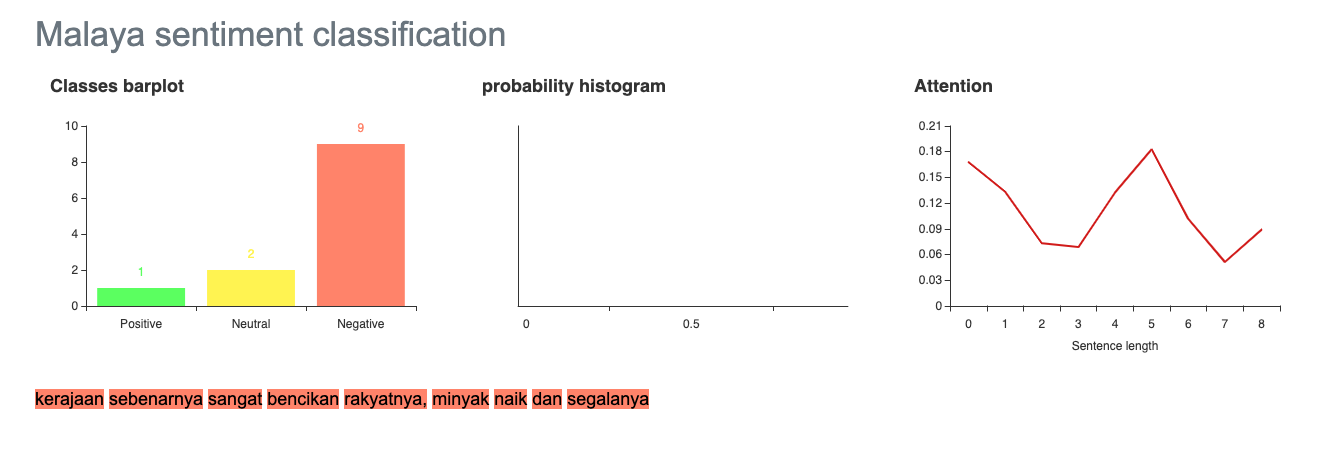

In [15]:
from IPython.core.display import Image, display

display(Image('bert-sentiment.png', width=800))

## List available deep learning models

In [16]:
malaya.sentiment.available_deep_model()

['self-attention', 'bahdanau', 'luong']

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load bahdanau model

In [18]:
model = malaya.sentiment.deep_model('bahdanau')

  0%|          | 0.00/128 [00:00<?, ?MB/s]

downloading frozen /Users/huseinzol/Malaya/sentiment/bahdanau model


128MB [00:23, 5.83MB/s]                          
  0%|          | 0.00/4.62 [00:00<?, ?MB/s]

downloading frozen /Users/huseinzol/Malaya/sentiment/bahdanau setting


5.00MB [00:00, 6.30MB/s]                          


#### Predict single string

In [19]:
model.predict(positive_text)

'positive'

In [20]:
result = model.predict(positive_text,get_proba=True,add_neutral=False)
result

{'negative': 0.07929755,
 'positive': 0.9207024,
 'attention': {'Kerajaan': 0.0017667037,
  'negeri': 0.0014957936,
  'Kelantan': 0.46610743,
  'mempersoalkan': 0.0037664792,
  'motif': 0.0078845,
  'kenyataan': 0.0018439741,
  'Menteri': 0.002363856,
  'Kewangan': 0.0016231886,
  'Lim': 0.054354765,
  'Guan': 0.05032179,
  'Eng': 0.010998619,
  'yang': 0.0013578659,
  'hanya': 0.0028823994,
  'menyebut': 0.0023527716,
  'penerima': 0.001361601,
  'terbesar': 0.0013514637,
  'bantuan': 0.0018559267,
  'kewangan': 0.0014328312,
  'dari': 0.001429535,
  'Persekutuan': 0.0018871789,
  'sebanyak': 0.0013242433,
  'RM50': 0.037062906,
  'juta': 0.0028047333,
  '.': 0.0,
  'Sedangkan': 0.0014257622,
  'menurut': 0.0013697163,
  'Timbalan': 0.0019074704,
  'Besarnya': 0.0013236435,
  ',': 0.0,
  'Datuk': 0.0013352379,
  'Mohd': 0.0013276986,
  'Amar': 0.001344325,
  'Nik': 0.0014375423,
  'Abdullah': 0.0013283616,
  'lain': 0.0015313325,
  'lebih': 0.0030933633,
  'maju': 0.020893773,
  'turu

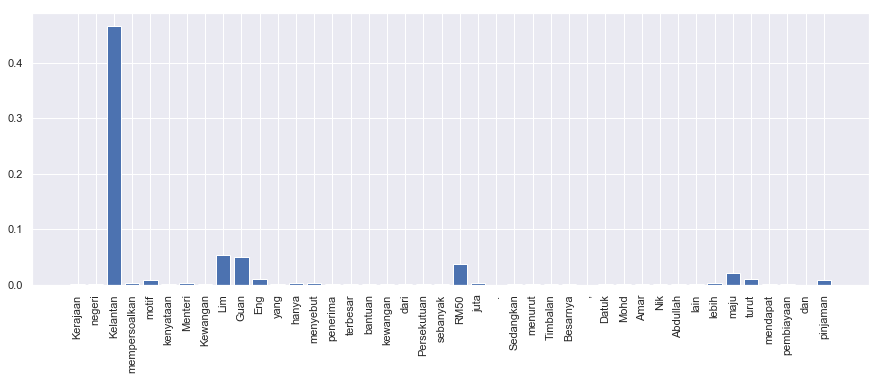

In [21]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open sentiment visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(positive_text)

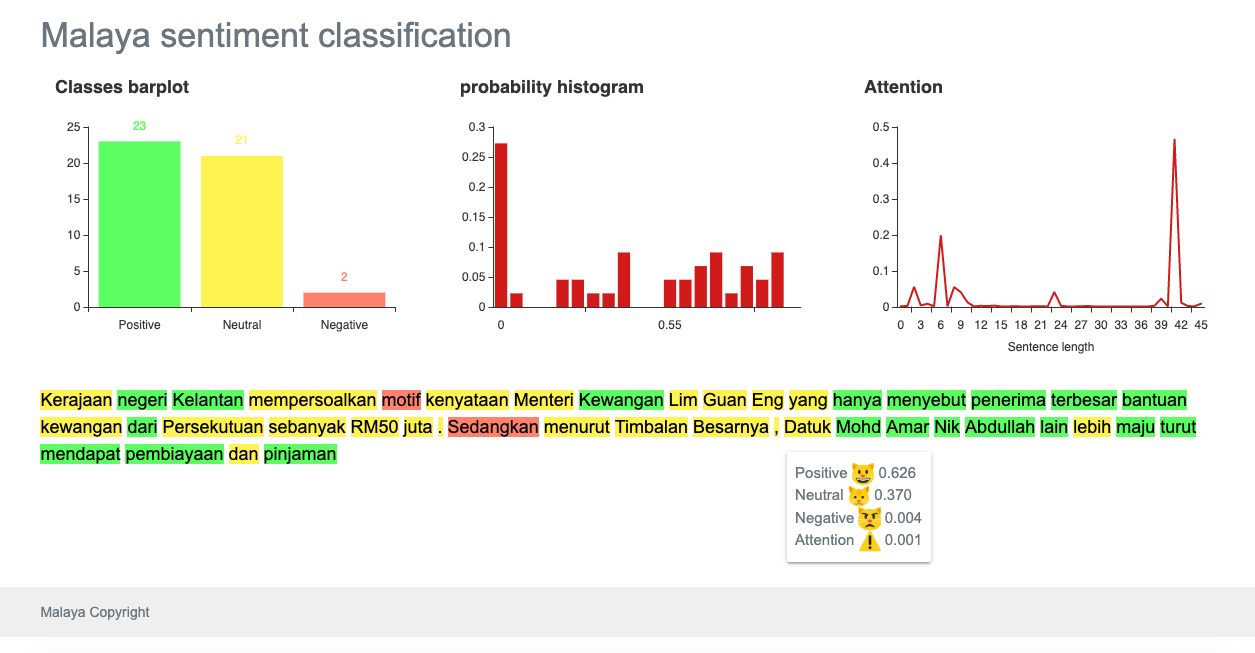

In [22]:
from IPython.core.display import Image, display

display(Image('sentiment-visualization.png', width=800))

#### Predict batch of strings

In [23]:
model.predict_batch([negative_text, positive_text],get_proba=True)

[{'negative': 0.9792671, 'positive': 0.00020732937, 'neutral': 0.020525575},
 {'negative': 0.0029228649, 'positive': 0.7077135, 'neutral': 0.28936362}]

**You might want to try `luong` and `self-attention` by yourself.**

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [24]:
multinomial = malaya.sentiment.multinomial()
bert = malaya.sentiment.bert()
bahdanau = malaya.sentiment.deep_model('bahdanau')

In [25]:
malaya.stack.predict_stack([multinomial, bert, bahdanau], positive_text)

[{'negative': 0.11057721467355211,
  'positive': 0.009369003104779816,
  'neutral': 0.16400192638683486}]